## Workshop 3 - Exploratory Data Analysis with Hospital Admissions Data
### Justin Ritenburgh
### MDST Winter 2020

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
filepath = 'HospitalAdmissionsData.csv'
admissions = pd.read_csv(filepath)

In [5]:
admissions.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

In [9]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   58863 non-null  int64  
 1   AdmissionLengthDays  58863 non-null  float64
 2   Death_1              58863 non-null  int64  
 3   Admission_Type       58863 non-null  object 
 4   Insurance_Type       58863 non-null  object 
 5   EnglishLanguage_1    58863 non-null  int64  
 6   Religion_Type        58408 non-null  object 
 7   Married_1            58863 non-null  int64  
 8   Race                 58863 non-null  object 
 9   Dx                   58863 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [17]:
admissions.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [16]:
admissions.Admission_Type.describe()

count         58863
unique            4
top       emergency
freq          41987
Name: Admission_Type, dtype: object

In [24]:
admissions.describe(include = 'object')

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


Text(0, 0.5, 'Count')

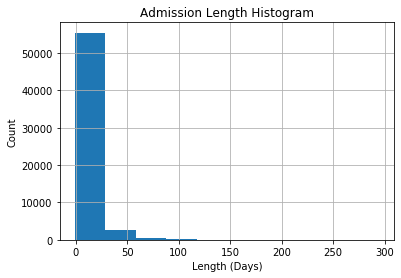

In [32]:
admissions.AdmissionLengthDays.hist()
plt.title("Admission Length Histogram")
plt.xlabel("Length (Days)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

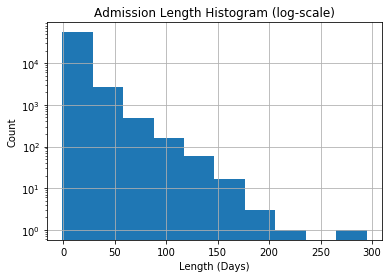

In [35]:
admissions.AdmissionLengthDays.hist(log = True)
plt.title("Admission Length Histogram (log-scale)")
plt.xlabel("Length (Days)")
plt.ylabel("Count")

In [50]:
admissions.groupby("Death_1")["AdmissionLengthDays"].mean()

Death_1
0    10.140012
1    10.129606
Name: AdmissionLengthDays, dtype: float64

Text(0, 0.5, 'Length (Days)')

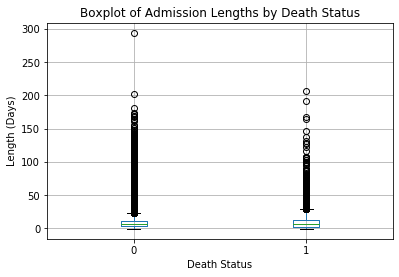

In [56]:
admissions.boxplot("AdmissionLengthDays", by = "Death_1")
plt.suptitle('')
plt.title("Boxplot of Admission Lengths by Death Status")
plt.xlabel("Death Status")
plt.ylabel("Length (Days)")

In [60]:
chi = stats.chi2_contingency(deathInsuranceType)
print(chi)

(990.8535593949656, 3.425615316200906e-213, 4, array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
          549.35545249],
       [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
           60.64454751]]))
